In [1]:
import numpy as np
import pandas as pd

In [2]:
cd Downloads/Math stats1/

/Downloads/Math stats1


In [3]:
ls

Diabetes_2014.csv  Diabetes_2018.csv  Heart_2014.csv     Statecodes.csv
Diabetes_2016.csv  Heart.csv          Heart_2016.csv     diabetes222.xlsx


In [4]:
#importing heart dataset
dataset = pd.read_csv("heart.csv", on_bad_lines='skip')
h16 = pd.read_csv("Heart_2014.csv", on_bad_lines='skip')
h14 = pd.read_csv("Heart_2016.csv", on_bad_lines='skip')
dataset=dataset.iloc[:,[1,7]]
print(dataset.shape)

(59094, 2)


In [5]:
statecodes=pd.read_csv("Statecodes.csv")
def code_to_state(dataset):
    df_copy = dataset.copy()
    for x in range(len(df_copy)):
        for y in range(len(statecodes["Code"])):
            if df_copy.loc[x, "LocationAbbr"] in statecodes["Code"].iloc[y]:
                df_copy.loc[x, "LocationAbbr"] = statecodes["State"].iloc[y]

    dataset = df_copy
    return dataset

In [6]:
dataset=code_to_state(dataset)
h14=code_to_state(h14)

In [7]:
h16=code_to_state(h16)

In [8]:
h14=h14.iloc[:,[1,7]]
h16=h16.iloc[:,[1,7]]

In [9]:
print(h14.shape)
print(h16.shape)

(59094, 2)
(59076, 2)


In [10]:
df = pd.read_csv("Diabetes_2018.csv",on_bad_lines='skip')
print(df.shape)
df_14=pd.read_csv("Diabetes_2014.csv", on_bad_lines='skip')
df_16=pd.read_csv("Diabetes_2016.csv", on_bad_lines='skip')

(3142, 6)


In [11]:
df.head()

,Year,County_FIPS,County,State,Diagnosed Diabetes Percentage,Overall SVI
0,2018,56039,Teton County,Wyoming,3.8,0.1127
1,2018,53055,San Juan County,Washington,4.5,0.0863
2,2018,49043,Summit County,Utah,4.8,0.05
3,2018,27045,Fillmore County,Minnesota,5.0,0.2169
4,2018,30031,Gallatin County,Montana,5.0,0.0427


In [12]:
#getting the average of all counties fo diabetes data
def cal_average(df):
    diabetes_dict = {}
    count_dict_diabetes = {}

    for state, value in zip(df.iloc[:, 3], df.iloc[:, 4]):
        if state in diabetes_dict:
            diabetes_dict[state] += value
            count_dict_diabetes[state] += 1
        else:
            diabetes_dict[state] = value
            count_dict_diabetes[state] = 1


    for state in diabetes_dict:
        diabetes_dict[state] /= count_dict_diabetes[state]


    del diabetes_dict['District of Columbia']
    return diabetes_dict

    #print(diabetes_dict)

In [36]:
diabetes_dict={}
diabetes14_dict={}
diabetes16_dict={}

In [37]:
diabetes14_dict=sorted(diabetes14_dict.items(), key=lambda x: x[1], reverse=True)
diabetes16_dict=sorted(diabetes16_dict.items(), key=lambda x: x[1], reverse=True)
diabetes_dict=sorted(diabetes_dict.items(), key=lambda x: x[1], reverse=True)


In [39]:
diabetes14_dict=cal_average(df_14)
diabetes16_dict=cal_average(df_16)
diabetes_dict=cal_average(df)

In [17]:
def average_heart(dataset):
    dataset = dataset.dropna()
    dict_heart = {}
    count_dict = {}


    for state, value in zip(dataset.iloc[:, 0], dataset.iloc[:, 1]):
        if state in dict_heart:
            dict_heart[state] += value
            count_dict[state] += 1
        else:
            dict_heart[state] = value
            count_dict[state] = 1
    for state in dict_heart:
        dict_heart[state] /= count_dict[state]
    print(dict_heart)
    return dict_heart

In [18]:
heart14_dict={}
heart16_dict={}
heart18_dict={}

In [19]:
heart14_dict=average_heart(h14)
heart16_dict=average_heart(h16)
heart18_dict=average_heart(dataset)

{'Connecticut': 247.77142857142852, 'Indiana': 348.8018369690011, 'Arizona': 274.74906367041206, 'Arkansas': 452.75284327323163, 'Florida': 284.14364406779686, 'Idaho': 285.76456043956057, 'Iowa': 331.23167358229585, 'Alaska': 326.0702586206894, 'GU': 593.5999999999999, 'Alabama': 448.2949421965317, 'Georgia': 377.32302993280285, 'Mississippi': 483.63379396984925, 'Michigan': 362.408362369338, 'Maryland': 297.83149847094813, 'South Carolina': 337.6137867647059, 'Oregon': 246.26004464285697, 'Nebraska': 305.3473684210527, 'Pennsylvania': 332.6998722860793, 'Oklahoma': 452.0417708333331, 'Tennessee': 420.3742919389973, 'Texas': 363.6048618398045, 'New Mexico': 310.40939759036127, 'US': 297.4777777777778, 'Washington': 267.2159049360144, 'Virginia': 328.78564988730267, 'Wisconsin': 298.13593750000024, 'New York': 310.349569495695, 'North Carolina': 307.13821070234064, 'Louisiana': 444.82518409425575, 'Kansas': 329.06116959064354, 'New Jersey': 281.93761194029855, 'Nevada': 331.67845528455

In [20]:
heart14_sorted = sorted(heart14_dict.items(), key=lambda x: x[1], reverse=True)
heart16_sorted = sorted(heart16_dict.items(), key=lambda x: x[1], reverse=True)
heart18_sorted = sorted(heart18_dict.items(), key=lambda x: x[1], reverse=True)

In [21]:
def clean_heart(sorted_dict):
    statecodes=pd.read_csv("Statecodes.csv")
    statecodes.head()
    df_state=set(df['State'])
    dataset_state=set(dataset['LocationAbbr'])
    codes=set(statecodes['Code'])
    state=set(statecodes['State'])
    extra_codes=dataset_state-state
    print(extra_codes)
    sorted_dict = [tup for tup in sorted_dict if tup[0] not in extra_codes]
    
    print(len(sorted_dict))
    return sorted_dict

In [22]:
heart14={}
heart16={}
heart18={}
heart14=clean_heart(heart14_sorted)
heart16=clean_heart(heart16_sorted)
heart18=clean_heart(heart18_sorted)

{'MP', 'AS', 'PR', 'DC', 'VI', 'US', 'GU'}
50
{'MP', 'AS', 'PR', 'DC', 'VI', 'US', 'GU'}
50
{'MP', 'AS', 'PR', 'DC', 'VI', 'US', 'GU'}
50


In [23]:
def merge(dict_heart,diabetes_dict):
    heart_df = pd.DataFrame(dict_heart, columns=['State', 'Heart_Average'])
    diabetes_df = pd.DataFrame(list(diabetes_dict.items()), columns=['State', 'Diabetes_Average'])
    merged_df = pd.merge(heart_df, diabetes_df, on='State', how='outer')
    #print(merged_df)
    return merged_df

In [43]:
merge14=merge(heart14, diabetes14_dict)
merge16=merge(heart16, diabetes16_dict)
merge18=merge(heart18, diabetes_dict)

In [44]:
type(diabetes_dict)

dict

In [57]:
result = pd.concat([merge16, merge14, merge18], ignore_index=True)
#result = np.log(result.iloc[:,[1,2]])

In [58]:
result

,State,Heart_Average,Diabetes_Average
0,Mississippi,495.518182,10.251220
1,Alabama,452.940996,10.695522
2,Louisiana,452.033086,9.778125
3,Oklahoma,451.891615,9.174026
4,Arkansas,447.272996,9.198667
...,...,...,...
145,Rhode Island,242.761290,7.640000
146,New Hampshire,241.099074,8.080000
147,Colorado,240.040962,6.845313
148,Oregon,232.224667,8.150000


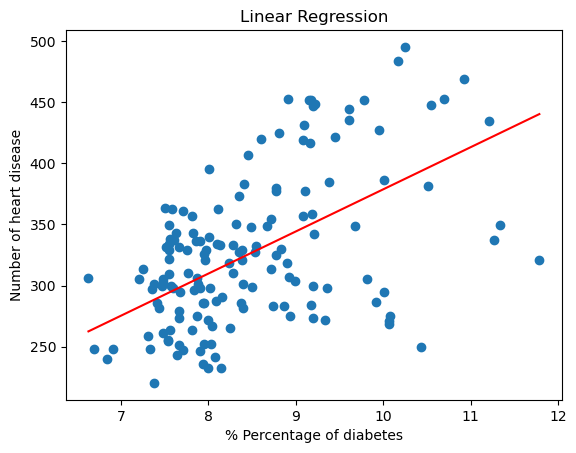

In [59]:
#modelling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x=result.iloc[:,2].to_numpy()
y=result.iloc[:,1].to_numpy()
plt.scatter(x,y)
m, c = np.random.random(), np.random.random()

def learn(x, y, m, c, epoch):
    for i in range(epoch):
        y_pred = m * x + c
        error = y - y_pred
        
        # Calculate gradients
        delta_m = (-2/len(x)) * np.sum(x * error)
        delta_c = (-2/len(x)) * np.sum(error)
        
        # Update m and c
        learning_rate = 0.01
        m -= learning_rate * delta_m
        c -= learning_rate * delta_c
    
    return m, c

# Call the learn function to update m and c
m, c = learn(x, y, m, c, 2000)

x1 = np.array([min(x), max(x)])
y1 = m * x1 + c
plt.plot(x1, y1, color='red')
plt.xlabel('% Percentage of diabetes')
plt.ylabel('Number of heart disease')
plt.title('Linear Regression')
plt.show()

In [80]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg = LinearRegression()
x = x.reshape(-1, 1)
y=y.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.06, random_state=0)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(reg.predict(y_test))
r2_score = r2_score(y_test, y_pred)
print(r2_score)

[[10236.95946143]
 [10497.59833056]
 [ 8838.04382724]
 [11273.59927731]
 [11953.92908032]
 [13778.39453636]
 [ 8051.08342023]
 [ 8425.02932024]
 [ 9143.14504767]]
0.3393889858148582


In [97]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from scipy.stats import kurtosis
# Add a constant term to the features for statsmodels
x_train_with_const = sm.add_constant(x_train)

# Fit the model using statsmodels OLS
model = sm.OLS(y_train, x_train_with_const).fit()

# Get the predictions on the test set
x_test_with_const = sm.add_constant(x_test)
y_pred = model.predict(x_test_with_const)

# Calculate metrics
r2_score_sklearn = metrics.r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Get statistics from statsmodels
p_values = model.pvalues
params = model.params
std_dev = np.sqrt(np.diag(model.cov_params()))
z_scores = params / std_dev

# Mean Error
mean_error = np.mean(y_test - y_pred)

residuals = y_test - y_pred
kurtosis_value = kurtosis(residuals)

# Print the results
print("R2 Score (sklearn):", r2_score_sklearn)

print("Mean Squared Error:", mse)
print("Coefficients:", params)
print("P values:", p_values)
print("Standard Deviation:", std_dev)
print("Z Scores:", z_scores)
print("Mean Error:", mean_error)

R2 Score (sklearn): 0.33938898581485855
Mean Squared Error: 2395.6521557817664
Coefficients: [77.99049158 29.20949615]
P values: [4.15570917e-02 9.28145008e-10]
Standard Deviation: [37.91488533  4.44512352]
Z Scores: [2.05698872 6.57113261]
Mean Error: 19.118745030608398
